In [1]:
import sys
if not sys.argv[1] == "-f":
    path = sys.argv[1]
    IF = "01"
    mode = "commandline"
else:
    # 手動で解析する場合はデータのあるpathを指定してください
    path = "/home/amigos/hdd/data/observation/otf/otf_2019/n20191002225346_12CO_2-1_otf_M17SW"
    path = "/home/amigos/hdd/data/observation/otf/otf_2019/n20191003010644_12CO_2-1_otf_M17SW"
    mode = "notebook"

In [126]:
import necstdb
import numpy
import matplotlib.pyplot as plt
import os
import pandas
from datetime import datetime as dt
from astropy.coordinates import get_body, AltAz, EarthLocation, SkyCoord
import astropy.units as u
from datetime import datetime as dt
from astropy.time import Time
nanten2 = EarthLocation(lat = -22.96995611*u.deg, lon = -67.70308139*u.deg, height = 4863.85*u.m)
import kisa_rev
import calc_coord
from numpy import deg2rad
from tqdm import tqdm

In [3]:
import sys
sys.path.append("/home/amigos/git/analy_n2data/script")

In [4]:
import get_cmdtel

In [5]:
ra, dec, ant_time = get_cmdtel.get_radec(os.path.join(path, "wc_list.txt"))

In [6]:
ant_time[-1]

1570065152.7782645

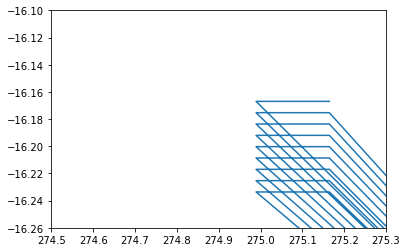

In [7]:
ra = numpy.array(ra)/3600
dec = numpy.array(dec)/3600
ra = numpy.where(ra < 0, ra+360, ra)
plt.xlim(274.5, 275.3)
plt.ylim(-16.26, -16.1)
plt.plot(ra, dec)
plt.show()

In [8]:
# iflist = ["01","02","03","04","05","06","07","08","09","10","11","12","13","14","15","16"]
import make_dset
IF = "01"
d, data, total_p = make_dset.get_data(path, IF)
d = numpy.array(d)
data = numpy.array(data)
xffts_data = data.T[2:].T

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16']


100%|██████████| 4/4 [00:00<00:00, 337.09it/s]


HOT 1.0
HOT 2.0
HOT 3.0
HOT 4.0
HOT 5.0
HOT 6.0
HOT 7.0
HOT 8.0
9.0 OFF 999999.0 999999.0
9.0 ON 999999.0 999999.0


In [9]:
n = necstdb.opendb(path)

In [10]:
obs_mode = d.T[0]

In [11]:
hotmask = obs_mode == "HOT"
offmask = obs_mode == "OFF"
onmask = obs_mode == "ON"

In [12]:
def chopper_wheel(on, off, hot, temprature = 300):
    Tastar = temprature * (on - off)/(hot - off)
    return Tastar

In [13]:
lamda_on = -84.9232*3600
grid = 30
beta_on = -16.2003*3600
N=9

In [14]:
azgrid = numpy.arange(lamda_on - ((N-1)/2)*grid, lamda_on + ((N-1)/2+1)*grid, grid)
elgrid = numpy.arange(beta_on - ((N-1)/2)*grid, beta_on + ((N-1)/2+1)*grid, grid)
azel_grid = numpy.meshgrid(azgrid, elgrid)

In [15]:
azel_grid[0] = azel_grid[0]
azel_grid[1] = azel_grid[1]

In [16]:
azel_grid

[array([[-305843.52, -305813.52, -305783.52, -305753.52, -305723.52,
         -305693.52, -305663.52, -305633.52, -305603.52],
        [-305843.52, -305813.52, -305783.52, -305753.52, -305723.52,
         -305693.52, -305663.52, -305633.52, -305603.52],
        [-305843.52, -305813.52, -305783.52, -305753.52, -305723.52,
         -305693.52, -305663.52, -305633.52, -305603.52],
        [-305843.52, -305813.52, -305783.52, -305753.52, -305723.52,
         -305693.52, -305663.52, -305633.52, -305603.52],
        [-305843.52, -305813.52, -305783.52, -305753.52, -305723.52,
         -305693.52, -305663.52, -305633.52, -305603.52],
        [-305843.52, -305813.52, -305783.52, -305753.52, -305723.52,
         -305693.52, -305663.52, -305633.52, -305603.52],
        [-305843.52, -305813.52, -305783.52, -305753.52, -305723.52,
         -305693.52, -305663.52, -305633.52, -305603.52],
        [-305843.52, -305813.52, -305783.52, -305753.52, -305723.52,
         -305693.52, -305663.52, -305633.5

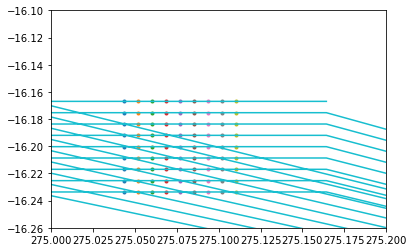

In [17]:
azel_grid[0] = numpy.where(azel_grid[0] < 0, azel_grid[0]+ 360*3600, azel_grid[0])
plt.plot(azel_grid[0]/3600, azel_grid[1]/3600, ".")
plt.plot(ra, dec)
plt.xlim(275, 275.2)
plt.ylim(-16.26, -16.1)
plt.show()

In [18]:
print(ant_time[-1])
print(xffts_time[-1])

1570065152.78


NameError: name 'xffts_time' is not defined

In [149]:
xffts_timestamp = data.T[1].T
xffts_timestamp = xffts_timestamp[onmask]
ant_time
plt.plot(xffts_timestamp - xffts_timestamp[0], "." ,label="xffts")
plt.plot(ant_time - ant_time[0], "." ,label="ant")
plt.legend()
plt.show()

In [150]:
#xffts_timestamp = xffts_timestamp[onmask]
index = []
for i in range(len(xffts_timestamp)):
    try:
        a = numpy.where(ant_time >  xffts_timestamp[i])
        print(a)
        index.append(a[0][0])
    except Exception as e:
        print(e)

(array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]),)
(array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]),)
(array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]),)
(array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]),)
(array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]),)
(array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]),)
(array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,


       35]),)
(array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35]),)
(array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35]),)
(array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35]),)
(array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35]),)
(array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35]),)
(array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35]),)
(array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35]),)
(array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35]),)
(array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35]),)
(array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35]),)
(array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35]

In [151]:
index

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,


In [152]:
ant_time = numpy.array(ant_time)

diff_ra = ra[1:] - ra[:-1]
diff_dec = dec[1:] - dec[:-1]
diff_time = ant_time[1:] - ant_time[:-1]

In [153]:
diff_ra
diff_dec
diff_time
ra

array([ 276.4413,  274.9893,  274.9893,  275.1643,  276.4413,  274.9893,
        274.9893,  275.1643,  276.4413,  274.9893,  274.9893,  275.1643,
        276.4413,  274.9893,  274.9893,  275.1643,  276.4413,  274.9893,
        274.9893,  275.1643,  276.4413,  274.9893,  274.9893,  275.1643,
        276.4413,  274.9893,  274.9893,  275.1643,  276.4413,  274.9893,
        274.9893,  275.1643,  276.4413,  274.9893,  274.9893,  275.1643])

In [154]:
xffts_ra = []
xffts_dec = []
xffts_time = []

In [155]:
for n, i in enumerate(index):
    try:
        xffts_ra.append((diff_ra[i-1]/diff_time[i-1]) * (xffts_timestamp[n] - ant_time[i-1]) + ra[i-1])#i-1
        xffts_dec.append((diff_dec[i-1]/diff_time[i-1]) * (xffts_timestamp[n] - ant_time[i-1]) + dec[i-1])#i-1
        xffts_time.append(xffts_timestamp[n])
        print(diff_ra[i], diff_time[i], xffts_timestamp[n] , ant_time[i-1],  ra[i-1])
    except Exception as e:
        print(e, i)

0.175 12.5999999046 1570064853.54 1570064850.39 274.9893
0.175 12.5999999046 1570064853.61 1570064850.39 274.9893
0.175 12.5999999046 1570064853.69 1570064850.39 274.9893
0.175 12.5999999046 1570064853.76 1570064850.39 274.9893
0.175 12.5999999046 1570064853.83 1570064850.39 274.9893
0.175 12.5999999046 1570064853.9 1570064850.39 274.9893
0.175 12.5999999046 1570064853.98 1570064850.39 274.9893
0.175 12.5999999046 1570064854.05 1570064850.39 274.9893
0.175 12.5999999046 1570064854.12 1570064850.39 274.9893
0.175 12.5999999046 1570064854.19 1570064850.39 274.9893
0.175 12.5999999046 1570064854.26 1570064850.39 274.9893
0.175 12.5999999046 1570064854.34 1570064850.39 274.9893
0.175 12.5999999046 1570064854.41 1570064850.39 274.9893
0.175 12.5999999046 1570064854.48 1570064850.39 274.9893
0.175 12.5999999046 1570064854.55 1570064850.39 274.9893
0.175 12.5999999046 1570064854.63 1570064850.39 274.9893
0.175 12.5999999046 1570064854.71 1570064850.39 274.9893
0.175 12.5999999046 1570064854.7

1.277 0.405516386032 1570064892.31 1570064891.92 274.9893
1.277 0.405516386032 1570064892.39 1570064891.92 274.9893
1.277 0.405516386032 1570064892.46 1570064891.92 274.9893
1.277 0.405516386032 1570064892.53 1570064891.92 274.9893
1.277 0.405516386032 1570064892.6 1570064891.92 274.9893
1.277 0.405516386032 1570064892.67 1570064891.92 274.9893
1.277 0.405516386032 1570064892.75 1570064891.92 274.9893
1.277 0.405516386032 1570064892.82 1570064891.92 274.9893
1.277 0.405516386032 1570064892.89 1570064891.92 274.9893
1.277 0.405516386032 1570064892.96 1570064891.92 274.9893
1.277 0.405516386032 1570064893.04 1570064891.92 274.9893
1.277 0.405516386032 1570064893.11 1570064891.92 274.9893
1.277 0.405516386032 1570064893.18 1570064891.92 274.9893
1.277 0.405516386032 1570064893.25 1570064891.92 274.9893
1.277 0.405516386032 1570064893.32 1570064891.92 274.9893
1.277 0.405516386032 1570064893.4 1570064891.92 274.9893
1.277 0.405516386032 1570064893.47 1570064891.92 274.9893
1.277 0.40551638

1.277 0.406638383865 1570064999.84 1570064998.28 274.9893
1.277 0.406638383865 1570064999.91 1570064998.28 274.9893
1.277 0.406638383865 1570064999.98 1570064998.28 274.9893
1.277 0.406638383865 1570065000.05 1570064998.28 274.9893
1.277 0.406638383865 1570065000.13 1570064998.28 274.9893
1.277 0.406638383865 1570065000.2 1570064998.28 274.9893
1.277 0.406638383865 1570065000.27 1570064998.28 274.9893
1.277 0.406638383865 1570065000.34 1570064998.28 274.9893
1.277 0.406638383865 1570065000.41 1570064998.28 274.9893
1.277 0.406638383865 1570065000.49 1570064998.28 274.9893
1.277 0.406638383865 1570065000.56 1570064998.28 274.9893
1.277 0.406638383865 1570065000.63 1570064998.28 274.9893
1.277 0.406638383865 1570065000.7 1570064998.28 274.9893
1.277 0.406638383865 1570065000.78 1570064998.28 274.9893
1.277 0.406638383865 1570065000.85 1570064998.28 274.9893
1.277 0.406638383865 1570065000.92 1570064998.28 274.9893
1.277 0.406638383865 1570065000.99 1570064998.28 274.9893
1.277 0.40663838

1.277 0.404895544052 1570065077.25 1570065069.27 274.9893
1.277 0.404895544052 1570065077.32 1570065069.27 274.9893
1.277 0.404895544052 1570065077.39 1570065069.27 274.9893
1.277 0.404895544052 1570065077.46 1570065069.27 274.9893
1.277 0.404895544052 1570065077.54 1570065069.27 274.9893
1.277 0.404895544052 1570065077.61 1570065069.27 274.9893
1.277 0.404895544052 1570065077.68 1570065069.27 274.9893
1.277 0.404895544052 1570065077.75 1570065069.27 274.9893
1.277 0.404895544052 1570065077.82 1570065069.27 274.9893
1.277 0.404895544052 1570065077.9 1570065069.27 274.9893
1.277 0.404895544052 1570065077.97 1570065069.27 274.9893
1.277 0.404895544052 1570065078.04 1570065069.27 274.9893
1.277 0.404895544052 1570065078.12 1570065069.27 274.9893
1.277 0.404895544052 1570065078.19 1570065069.27 274.9893
1.277 0.404895544052 1570065078.26 1570065069.27 274.9893
1.277 0.404895544052 1570065078.33 1570065069.27 274.9893
1.277 0.404895544052 1570065078.4 1570065069.27 274.9893
1.277 0.40489554

In [156]:
print(diff_ra)
print(diff_dec)
print(diff_time)
ra

[-1.452  0.     0.175  1.277 -1.452  0.     0.175  1.277 -1.452  0.     0.175
  1.277 -1.452  0.     0.175  1.277 -1.452  0.     0.175  1.277 -1.452  0.
  0.175  1.277 -1.452  0.     0.175  1.277 -1.452  0.     0.175  1.277
 -1.452  0.     0.175]
[  3.77366667e-01   3.55271368e-15   0.00000000e+00  -3.77366667e-01
   3.85700000e-01   0.00000000e+00   0.00000000e+00  -3.85700000e-01
   3.94033333e-01   3.55271368e-15   0.00000000e+00  -3.94033333e-01
   4.02366667e-01   3.55271368e-15   0.00000000e+00  -4.02366667e-01
   4.10700000e-01   7.10542736e-15   0.00000000e+00  -4.10700000e-01
   4.19033333e-01   0.00000000e+00   0.00000000e+00  -4.19033333e-01
   4.27366667e-01   0.00000000e+00   0.00000000e+00  -4.27366667e-01
   4.35700000e-01   3.55271368e-15   0.00000000e+00  -4.35700000e-01
   4.44033333e-01   0.00000000e+00   0.00000000e+00]
[ 43.78521013   6.07382059  12.5999999    0.40386724  16.34489512
   6.10342503  12.5999999    0.40551639  16.34876943   6.10183048
  12.5999999    

array([ 276.4413,  274.9893,  274.9893,  275.1643,  276.4413,  274.9893,
        274.9893,  275.1643,  276.4413,  274.9893,  274.9893,  275.1643,
        276.4413,  274.9893,  274.9893,  275.1643,  276.4413,  274.9893,
        274.9893,  275.1643,  276.4413,  274.9893,  274.9893,  275.1643,
        276.4413,  274.9893,  274.9893,  275.1643,  276.4413,  274.9893,
        274.9893,  275.1643,  276.4413,  274.9893,  274.9893,  275.1643])

In [157]:
t2 = ant_time[5]
t1 = ant_time[4]
print(t1, t2)
tt = numpy.where((xffts_timestamp > t1) | (xffts_timestamp <t2))

1570064869.47 1570064885.82


<IPython.core.display.Javascript object>


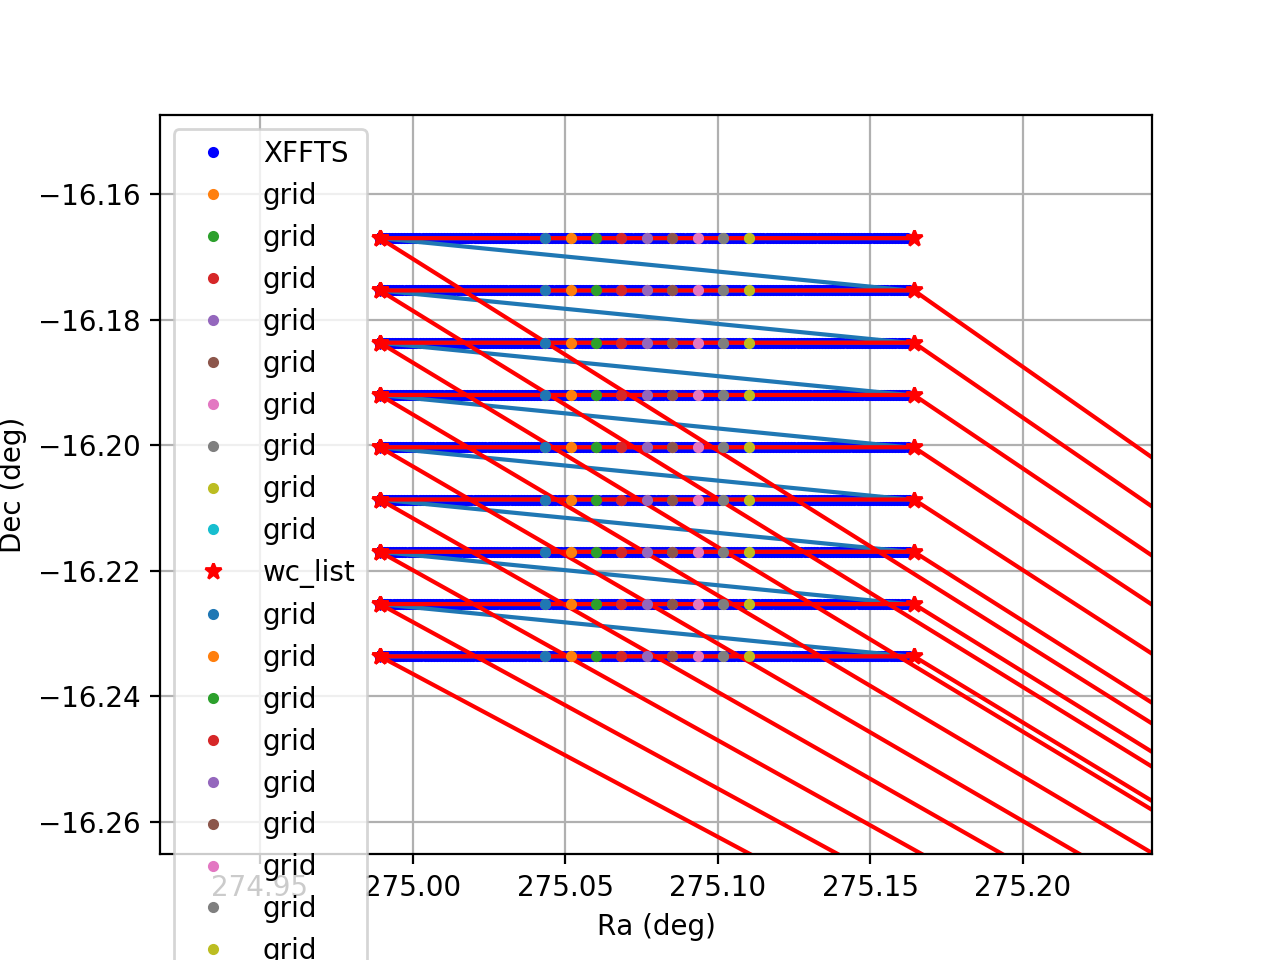

In [187]:
%matplotlib notebook
plt.plot(xffts_ra, xffts_dec, "b.", label="XFFTS")
plt.plot(xffts_ra, xffts_dec)
plt.plot(azel_grid[0]/3600, azel_grid[1]/3600, ".", label="grid")
plt.plot(ra, dec, "r*", label="wc_list")
plt.plot(ra, dec, "r")
plt.plot(azel_grid[0]/3600, azel_grid[1]/3600, ".", label="grid")
plt.xlabel("Ra (deg)")
plt.ylabel("Dec (deg)")
plt.legend()
plt.grid()
# plt.xlim(274.9, 275.2)
# plt.ylim(-16.26, -16.14)
plt.show()

In [159]:
plt.plot(xffts_timestamp, ".")
plt.plot(ant_time - ant_time[0], "." ,label="ant")
plt.legend()
plt.show()

In [160]:

xffts_ra = numpy.array(xffts_ra)
xffts_dec = numpy.array(xffts_dec)

In [161]:
from tqdm import tqdm
max_scannum = 9
offset = 30

In [173]:
azgrid = numpy.array(azgrid)
azgrid += 360*3600
#xffts_ra*3600

In [174]:
%time
index_list = []
for i in tqdm(range(max_scannum)):
    tmp = []
    for j in range(max_scannum):
       # print(ragrid[i], decgrid[j])
        index1 = numpy.where((azgrid[i]-(offset)<xffts_ra*3600) & ((azgrid[i] + (offset)>xffts_ra*3600)))
        index2 = numpy.where((elgrid[j]-(offset)<xffts_dec*3600) & ((elgrid[j] + (offset)>xffts_dec*3600)))
        index_ = [i in index2[0] for i in index1[0]]
        index_ = numpy.array(index_)
        index_1and2 = numpy.where(index_ == True)
        index_1and2 = index1[0][index_1and2]
        tmp.append(index_1and2)
    index_list.append(tmp)
print(index_1and2)

100%|██████████| 9/9 [00:00<00:00, 134.50it/s]

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 7.39 µs
[1861 1862 1863 1864 1865 1866 1867 1868 1869 1870 1871 1872 1873 1874 1875
 1876 1877]


In [177]:
len(index_list)

9

In [178]:
#off integration
off = []
scanmasks = numpy.unique(d.T[1])
for i in scanmasks:
    scanmask = d.T[1] == i
    mask = numpy.logical_and(offmask, scanmask)
    off.append(numpy.mean(total_p[mask]))

/home/amigos/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/amigos/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [179]:
#hot integration
hot = []
scanmasks = numpy.unique(d.T[1])
for i in scanmasks:
    scanmask = d.T[1] == i
    mask = numpy.logical_and(hotmask, scanmask)
    hot.append(numpy.mean(total_p[mask]))

/home/amigos/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/amigos/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [180]:
hot
off

[nan,
 1046709899.434395,
 1046709923.0606805,
 1046709946.688265,
 1046709970.3171157,
 1046709993.956233,
 1046710017.6492407,
 1046710041.2999533,
 1046710064.9085666,
 1046710088.5525665,
 nan]

In [ ]:
index_list

In [ ]:
_d = numpy.zeros((9, 9))
for i in range(9):
    for j in range(9):
        on = numpy.mean(total_p[index_list[i][j]])
        print(on , off[i], hot[i])
        _d[i][j] = Tastar = chopper_wheel(on , off[i], hot[i])

In [ ]:
plt.imshow(_d)
plt.show()

In [ ]:
_d